In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path ="data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_df = pd.merge(mouse_metadata,study_results, how="left", on='Mouse ID')
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [33]:
horde_size = mouse_df['Mouse ID'].unique()
horde_size.__len__()

249

In [34]:
mouse_df_clean = mouse_df.drop_duplicates(['Mouse ID'])
mouse_df_clean



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [35]:
mouse_count = mouse_df_clean['Mouse ID'].count()
mouse_count

249

In [39]:
tumor_mean_volume = mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumor_median_volume = mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_variance_volume = mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_std_volume = mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_sem_volume = mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

In [42]:
drug_stats = pd.DataFrame({'Mean Tumor Volume': tumor_mean_volume,'Median Tumor Volume':tumor_median_volume,
               'Tumor Volume Variance':tumor_variance_volume,'Tumor Volume Std. Dev.':tumor_std_volume,
               'Tumor Volume Std. Err.':tumor_sem_volume})
drug_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


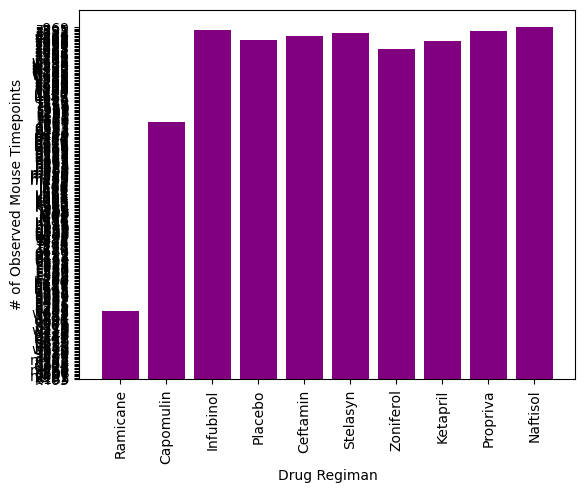

In [89]:
x_axis = mouse_df['Drug Regimen']
y_axis = mouse_df.groupby(['Mouse ID'])

plt.bar(x_axis,y_axis, color='purple', align='center')
plt.xlabel('Drug Regiman')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.show()